<a href="https://colab.research.google.com/github/drigovieira/student-passing-rate-prediction/blob/main/Previs%C3%A3o_de_Aprova%C3%A7%C3%A3o_de_Alunos_com_Regress%C3%A3o_Linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [310]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [311]:
df = pd.read_excel('correlacao_linear_simples_exercicio.xlsx')

In [312]:
df.head()

,UF,ano_2015,ano_2016
0,Rondonia,77,85
1,Acre,79,81
2,Amazonas,83,85
3,Roraima,81,82
4,Para,73,76


In [313]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   UF        27 non-null     object
 1   ano_2015  27 non-null     int64 
 2   ano_2016  27 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 776.0+ bytes


In [314]:
df.describe()

,ano_2015,ano_2016
count,27.000000,27.000000
mean,79.333333,80.185185
std,4.969136,4.820126
min,68.000000,70.000000
25%,76.000000,76.500000
50%,80.000000,81.000000
75%,81.500000,82.500000
max,89.000000,91.000000


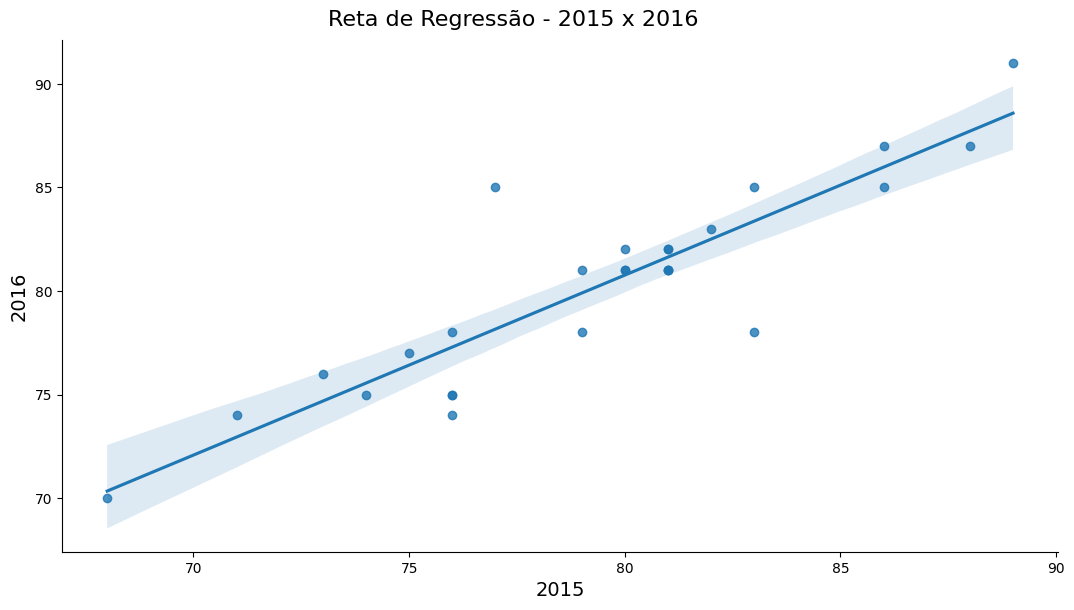

In [315]:
#Crie um gráfico com a reta de regressão
ax = sns.lmplot(x="ano_2015", y="ano_2016", data=df)
ax.fig.set_size_inches(12, 6)
ax.fig.suptitle('Reta de Regressão - 2015 x 2016', fontsize=16, y=1.02)
ax.set_xlabels("2015", fontsize=14)
ax.set_ylabels("2016", fontsize=14)
ax;

In [316]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric.head()

,ano_2015,ano_2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76


In [317]:
df_numeric.corr()

,ano_2015,ano_2016
ano_2015,1.000000,0.894957
ano_2016,0.894957,1.000000


In [318]:
import statsmodels.api as sm

In [319]:
Y = df_numeric.ano_2016
X = sm.add_constant(df_numeric.ano_2015)

In [320]:
resulta_regressao = sm.OLS(Y, X).fit()

In [321]:
print(resulta_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:               ano_2016   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     100.6
Date:                Wed, 11 Dec 2024   Prob (F-statistic):           3.02e-10
Time:                        14:26:37   Log-Likelihood:                -58.476
No. Observations:                  27   AIC:                             121.0
Df Residuals:                      25   BIC:                             123.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3143      6.880      1.645      0.1

In [322]:
df_numeric['Y_previsto'] = resulta_regressao.predict()
df_numeric.head()

,ano_2015,ano_2016,Y_previsto
0,77,85,78.159571
1,79,81,79.895812
2,83,85,83.368294
3,81,82,81.632053
4,73,76,74.687089


In [323]:
df_numeric['residuo'] = round(df_numeric['Y_previsto'] - df_numeric['ano_2016'], 0)
df_numeric

,ano_2015,ano_2016,Y_previsto,residuo
0,77,85,78.159571,-7.0
1,79,81,79.895812,-1.0
2,83,85,83.368294,-2.0
3,81,82,81.632053,-0.0
4,73,76,74.687089,-1.0
5,76,75,77.291450,2.0
6,81,82,81.632053,-0.0
7,81,81,81.632053,1.0
8,80,81,80.763932,-0.0
9,86,85,85.972655,1.0
